## MLP Class implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MLP:
    def __init__(self, layers, weights, biases, activation_func):
        ''' 
        layers: list consiting of number of neurons on every layer
        weights : list of weight matrixes for every layer
        biases : list of bias vectors for every layer
        activation_func : activation function that will be used on hidden layers, must have one argument : x
        '''
        self.layers = layers
        self.weights = weights
        self.biases = biases
        self.activation_func = activation_func

    
    def linear_func(self,x):
        return x
    
    def single_forward(self, input, weights, biases):
        z = np.dot(weights, input) + biases
        
        return self.activation_func(z)



    def forward_propagation(self, x):
        current = x
        for i in range(len(self.weights)-1):
            weights = self.weights[i]
            biases = self.biases[i]
            current = self.single_forward(current, weights, biases)

        current = self.linear_func(np.dot(self.weights[-1], current) + self.biases[-1])
        return current
    
        
       
    def calculate_mse(self,y_pred, y):
        return np.mean((y - y_pred) ** 2)


def sigmoid(x):
        return 1/(1+np.exp(-x))  

In [10]:
def perform_calculations(weights, biases,layers, X, y):
    mlp = MLP(layers,weights, biases, activation_func=sigmoid)

    pred = mlp.forward_propagation(X)

    plt.scatter(X,y, label='original df')
    plt.scatter(X, pred.flatten(), label='predictions')
    plt.show()
    print(f"MSE:{mlp.calculate_mse(np.array(pred.flatten()), y)}")

## Steps dataset

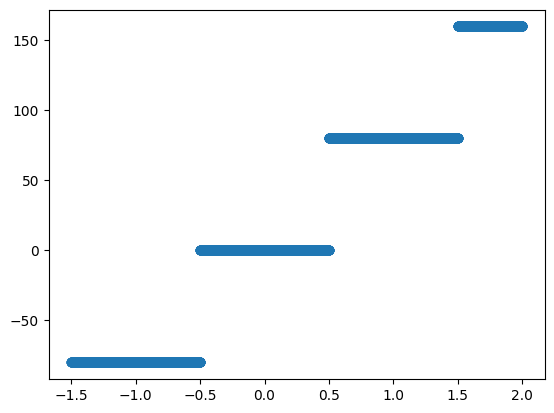

In [14]:
df1_train = pd.read_csv("C:\\Users\\rogal\\SEM6\\Metody inteligencji\\lab1\\steps-large-training.csv", index_col=0)
df1_test = pd.read_csv("C:\\Users\\rogal\\SEM6\\Metody inteligencji\\lab1\\steps-large-test.csv", index_col=0)

X =df1_train.iloc[:,0].to_numpy().reshape(-1,1).T
y = df1_train.iloc[:,1]
X_test = df1_test.iloc[:,0].to_numpy().reshape(-1,1).T
y_test = df1_test.iloc[:,1]

plt.scatter(df1_train.x, df1_train.y)

Let's consider the fact that this is a step function with 3 steps: for x = -0.5, x = 0.5 and x = 1.5. <br>
This may suggest that we will only need 3 activated neurons.

#### Architecture 1 : one hidden layer 5neurons

x = 2 -> y = 160 <br>
x = 1 -> y = 80 <br>
x = 0 -> y = 0 <br>
x = -1 -> y = -80 <br>

As the neuron gets activated when the value of z is significantly larger than 0 (then output of hidden layer is around 1) we can set all hidden layer weights to 80, and output layer bias to -80. This way we can activate: <br>
* 0 neurons for x = -1
* 1 neuron for x = 0
* 2 neurons for x = 1
* 3 neurons for x = 2
<br> and leave 2 remaingns neurons inactive and with bias = 0 <br>
Let's set all first layer weights to 100 (for first 3 neurons) and biases accordingly so that x*weight + bias is activated for our 3 steps.

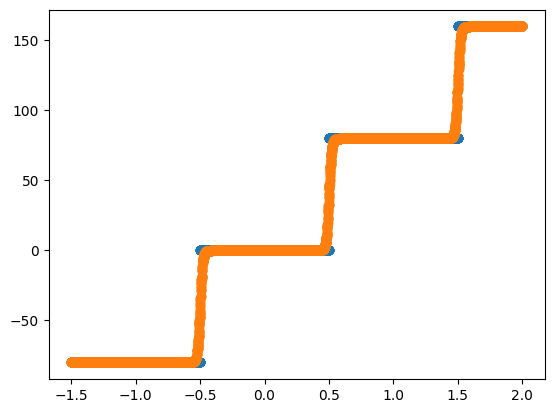

MSE:21.28917634739372


In [11]:
# attempt 1
layers=[1,5,1]
weights =[
    np.array([[100,100,100,0,0]]).reshape(5,1),
    np.array([[80,80,80,0,0]]).reshape(1,5)
]


biases = [
    np.array([[-50,50,-150,0,0]]).reshape(5,1),
    np.array([[-80]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)


We are close when it comes to the plot, but MSE is too high, let's increase weights and biases to make sigmoid function even more steep.

C:\Users\rogal\AppData\Local\Temp\ipykernel_25912\2538500406.py:42: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


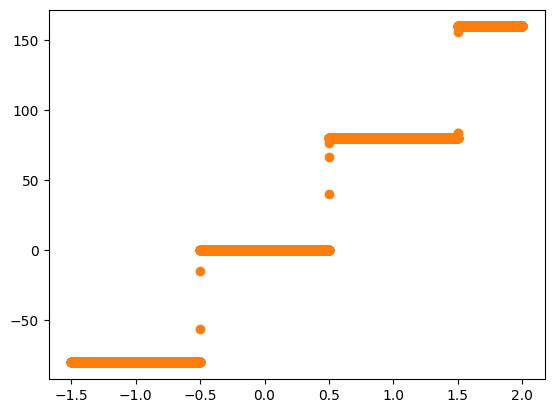

MSE:0.259693182432512


In [12]:
# attempt 2
layers=[1,5,1]
weights =[
    np.array([[10000,10000,10000,0,0]]).reshape(5,1),
    np.array([[80,80,80,0,0]]).reshape(1,5)
]


biases = [
    np.array([[-5000,5000,-15000,0,0]]).reshape(5,1),
    np.array([[-80]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)

C:\Users\rogal\AppData\Local\Temp\ipykernel_25912\2538500406.py:42: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


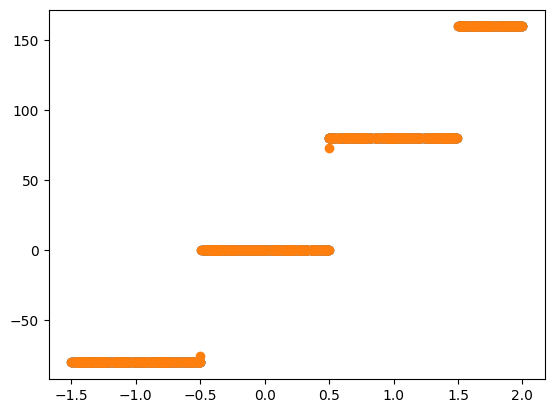

MSE:0.07092598359748757


In [15]:
# attempt 2 on test df:
layers=[1,5,1]
weights =[
    np.array([[10000,10000,10000,0,0]]).reshape(5,1),
    np.array([[80,80,80,0,0]]).reshape(1,5)
]


biases = [
    np.array([[-5000,5000,-15000,0,0]]).reshape(5,1),
    np.array([[-80]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X_test, y_test)


MSE < 9  for both datasets.

#### Architecture 2 : One hidden layer with 10 neurons

This architecture for the steps df will be done the same way:

C:\Users\rogal\AppData\Local\Temp\ipykernel_25912\2538500406.py:42: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


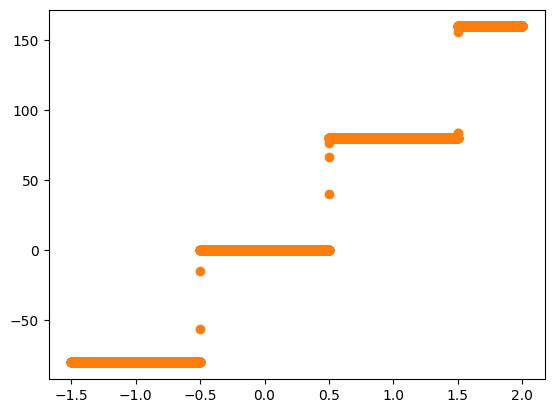

MSE:0.259693182432512


In [16]:
# attempt 1 on test df
layers=[1,10,1]
weights =[
    np.array([[10000,10000,10000,0,0,0,0,0,0,0]]).reshape(10,1),
    np.array([[80,80,80,0,0,0,0,0,0,0]]).reshape(1,10)
]


biases = [
    np.array([[-5000,5000,-15000,0,0,0,0,0,0,0]]).reshape(10,1),
    np.array([[-80]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)

MSE < 9

#### Architecture 3: two hidden layers with 5 neurons

This parts has the first weights and biases same as before but now we will select second weights so that the first node of first layer can only 'go' to the first neuron of second layer and so on. Here we have to take into consideration that second hidden layer returns 0.5 when input value is equal to 0, that is why the third weights will be 2x greater than before (= 160) and accordingly bias in output neuron will be selected so that all the cases are correct.

C:\Users\rogal\AppData\Local\Temp\ipykernel_25912\2538500406.py:42: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


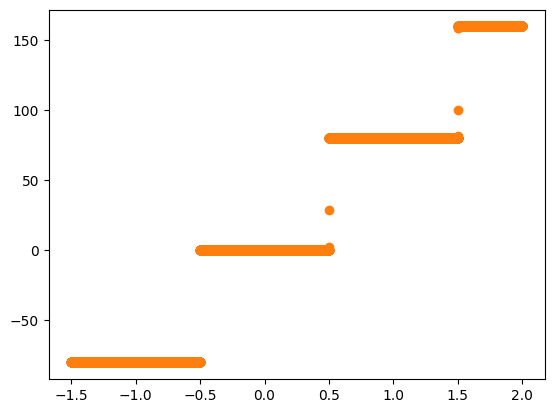

MSE:2.0097458308999085


In [17]:
# attempt 1 
layers=[1,5,5,1]
weights =[
    np.array([[10000,10000,10000,0,0]]).reshape(5,1),
    np.array([[100,0,0,0,0],[0,100,0,0,0],[0,0,100,0,0],[0,0,0,0,0],[0,0,0,0,0]]).reshape(5,5),
    np.array([[160,160,160,0,0]]).reshape(1,5)
]


biases = [
    np.array([[-5000,5000,-15000,0,0]]).reshape(5,1),
    np.array([0,0,0,0,0]).reshape(5,1),
    np.array([[-320]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)


C:\Users\rogal\AppData\Local\Temp\ipykernel_25912\2538500406.py:42: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


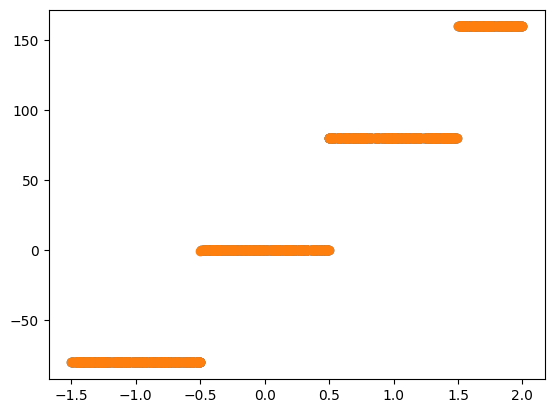

MSE:6.348210037685475


In [18]:
# attempt 1 : test df
layers=[1,5,5,1]
weights =[
    np.array([[10000,10000,10000,0,0]]).reshape(5,1),
    np.array([[100,0,0,0,0],[0,100,0,0,0],[0,0,100,0,0],[0,0,0,0,0],[0,0,0,0,0]]).reshape(5,5),
    np.array([[160,160,160,0,0]]).reshape(1,5)
]


biases = [
    np.array([[-5000,5000,-15000,0,0]]).reshape(5,1),
    np.array([0,0,0,0,0]).reshape(5,1),
    np.array([[-320]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X_test, y_test)


MSE not so small but still < 9.

## Square simple dataset

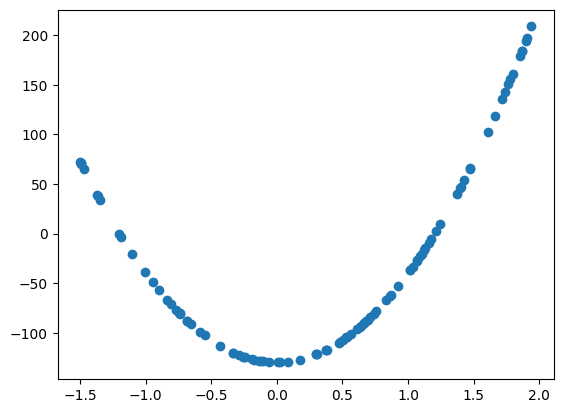

In [19]:
df2_train = pd.read_csv("C:\\Users\\rogal\\SEM6\\Metody inteligencji\\lab1\\square-simple-training.csv", index_col=0)
df2_test = pd.read_csv("C:\\Users\\rogal\\SEM6\\Metody inteligencji\\lab1\\square-simple-test.csv", index_col=0)

X =df2_train.iloc[:,0].to_numpy().reshape(-1,1).T
X_test = df2_test.iloc[:,0].to_numpy().reshape(-1,1).T
y = df2_train['y'].values
y_test = df2_test['y'].values 
plt.scatter(df2_train.x, df2_train.y)

#### Architecture 1 : one hidden layer with 5 neurons

Attempt 1 - trial and error with plot

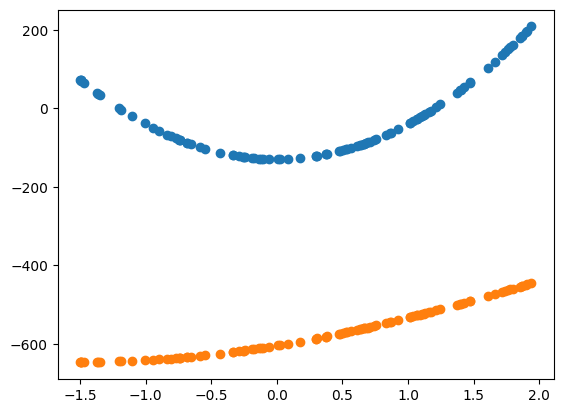

MSE:295322.2182776979


In [20]:
# 1
layers=[1,5,1]
weights =[
    np.array([[0.2,0.3,-0.6,0,0]]).reshape(5,1),
    np.array([[2000,-2000,-800,0,0]]).reshape(1,5)
]


biases = [
    np.array([[1,1,1,0,0]]).reshape(5,1),
    np.array([[-20]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)

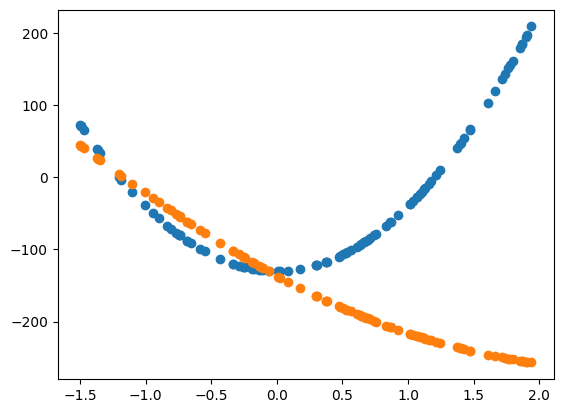

MSE:35719.98985177261


In [21]:
# 2
layers=[1,5,1]
weights =[
    np.array([[0.2,0.5,-0.8,0,0]]).reshape(5,1),
    np.array([[2500,-2000,-500,0,0]]).reshape(1,5)
]

biases = [
    np.array([[1,1,20,0,0]]).reshape(5,1),
    np.array([[-2]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)


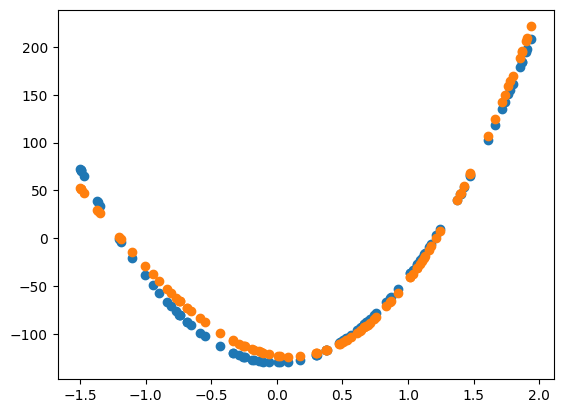

MSE:82.40993808696378


In [22]:
# 3
layers=[1,5,1]
weights =[
    np.array([[0.262,0.602,-0.663,0,0]]).reshape(5,1),
    np.array([[4371,-3510,-2931,0,0]]).reshape(1,5)
]


biases = [
    np.array([[0.793,0.820,2.136,0,0]]).reshape(5,1),
    np.array([[1926]]).reshape(1,1)
]

perform_calculations(weights, biases, layers, X, y)

Manual guessing was not successfull, the bes MSE was around 80. Therefore I tried optimisation methods using other packages and achieved:

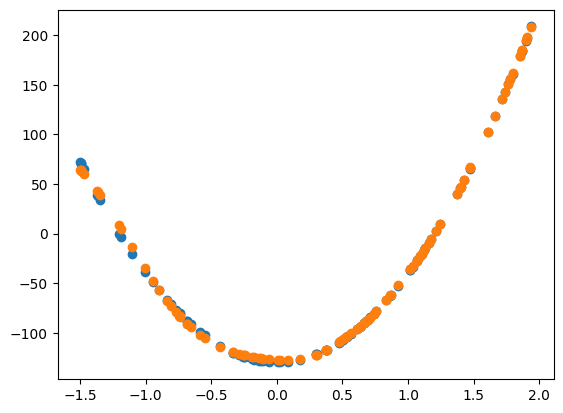

MSE:7.024645587128754


In [23]:
# after optimisation - train
layers=[1,5,1]
optimised_weights =[
    np.array([[ 5.3366],
        [ 6.7180],
        [ 6.3825],
        [-3.6916],
        [ 9.9249]]),
    np.array([[150.7240,  67.2557, 177.6554, 245.1390,  24.9531]]).reshape(1,5)
]


optimised_biases = [
    np.array([[ -7.3349,  -5.7196, -12.0341,  -4.1405,  -4.1225]]).reshape(5,1),
    np.array([[-132]]).reshape(1,1)
]

perform_calculations(optimised_weights, optimised_biases, layers, X, y)


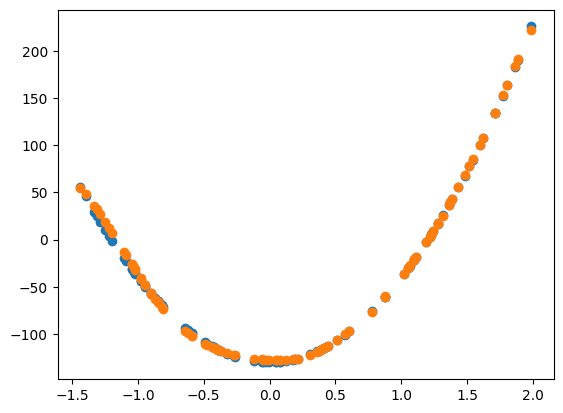

MSE:7.458206062091985


In [24]:
# after optimisation - test
layers=[1,5,1]
optimised_weights =[
    np.array([[ 5.3366],
        [ 6.7180],
        [ 6.3825],
        [-3.6916],
        [ 9.9249]]),
    np.array([[150.7240,  67.2557, 177.6554, 245.1390,  24.9531]]).reshape(1,5)
]


optimised_biases = [
    np.array([[ -7.3349,  -5.7196, -12.0341,  -4.1405,  -4.1225]]).reshape(5,1),
    np.array([[-132]]).reshape(1,1)
]

perform_calculations(optimised_weights, optimised_biases, layers, X_test, y_test)



MSE < 9.